## SSAC - Exploration 16 - SRGAN, Bicubic Interpolation

프로젝트 1-1.

1. 높은 해상도 이미지를 bicubic interpolation으로 축소한다.   
2. 축소된 이미지를 gicubic, 사전 학습된 srgan으로 복원해 본다. (사전 학습된 srgan은 pixel 수를 4배 증가시키는 모델)   
3. 원본, bicubic 복원, srgan 복원을 비교한다.  

사용한 사진 https://unsplash.com/photos/zCPPpU-vwdc

---
### 프로젝트 1-1   
   
프로젝트 1-1.   
   
1. 높은 해상도 이미지를 bicubic interpolation으로 축소한다.   
2. 축소된 이미지를 gicubic, 사전 학습된 srgan으로 복원해 본다. (사전 학습된 srgan은 pixel 수를 4배 증가시키는 모델)   
3. 원본, bicubic 복원, srgan 복원을 비교한다.   
   
사용한 사진 https://unsplash.com/photos/zCPPpU-vwdc   
   
1. **이미지 불러오기**

In [58]:
image_path = os.getenv('HOME')+'/aiffel/super_resolution/images/image_hr_med.jpg'

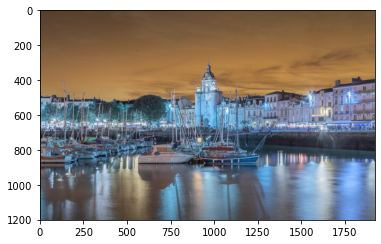

In [59]:
img = cv2.imread(image_path)
plt.imshow(img)

2. **이미지 1/4로 줄인 후, bicubic interpolation, srgan 적용해 축소 이미지 픽셀을 4배로 늘리기** 

In [32]:
# 이미지를 특정 크기로 줄이고 다시 늘리는 과정을 함수로 정의합니다.

def downsample_by_n(image, n):
    input_shape = image.shape[:2]
    downsample = cv2.resize(
        image,
        dsize=(input_shape[1]//n, input_shape[0]//n),
        interpolation=cv2.INTER_CUBIC
    )
    return downsample

def upsample_by_n(image, n):
    input_shape = image.shape[:2]
    upsample = cv2.resize(
        image,
        dsize=(input_shape[1]*n, input_shape[0]*n),
        interpolation=cv2.INTER_CUBIC
    )
    return upsample


import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)


def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

3. **나란히 시각화하기**

Text(0.5, 1.0, 'Original')

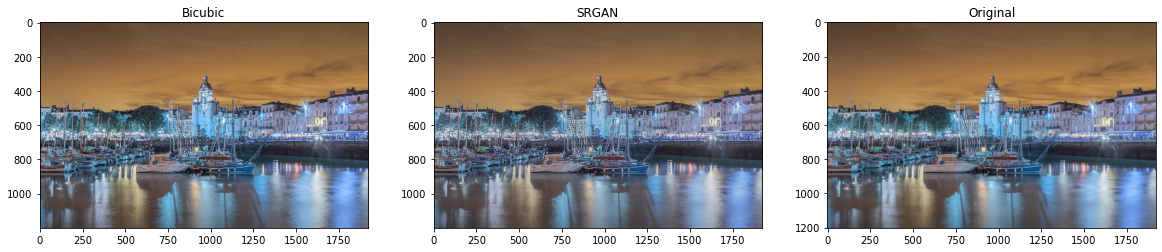

In [60]:
ds4_img = downsample_by_n(img, 4) # 1/4배 축소
us4_img = upsample_by_n(ds4_img, 4) # 4배 복원
srgan_img = apply_srgan(ds4_img)

# 이미지를 시각화합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(us4_img); plt.title('Bicubic')
plt.subplot(1,3,2); plt.imshow(srgan_img); plt.title('SRGAN')
plt.subplot(1,3,3); plt.imshow(img); plt.title('Original')

In [37]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

Text(0.5, 1.0, 'Original')

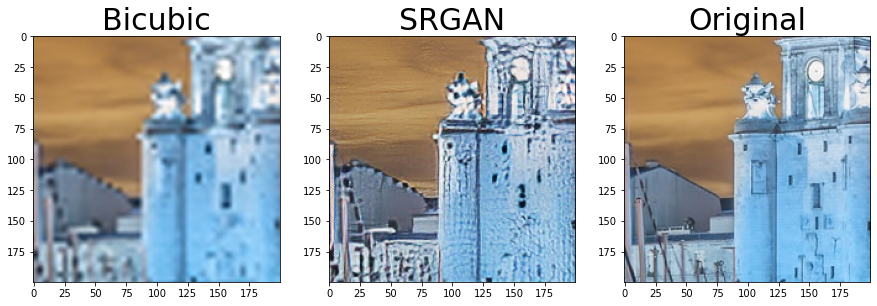

In [61]:
# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 800)

crop_bicubic = crop(us4_img, left_top)
crop_srgan = crop(srgan_img, left_top)
crop_orig = crop(img, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(crop_bicubic); plt.title("Bicubic", fontsize=30)
plt.subplot(1,3,2); plt.imshow(crop_srgan); plt.title("SRGAN", fontsize=30)
plt.subplot(1,3,3); plt.imshow(crop_orig); plt.title("Original", fontsize=30)

Text(0.5, 1.0, 'Original')

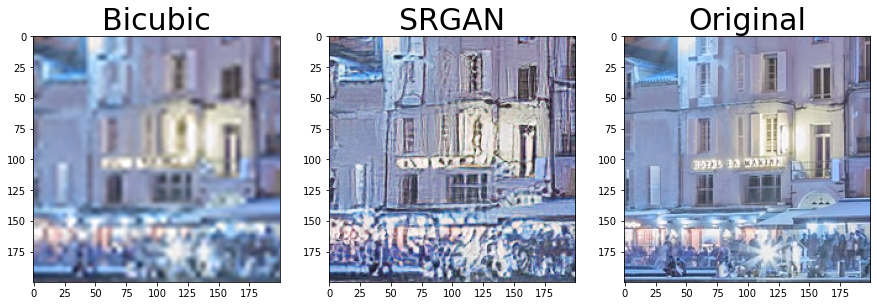

In [42]:
# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (500, 1500)

crop_bicubic = crop(us4_img, left_top)
crop_srgan = crop(srgan_img, left_top)
crop_orig = crop(img, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(crop_bicubic); plt.title("Bicubic", fontsize=30)
plt.subplot(1,3,2); plt.imshow(crop_srgan); plt.title("SRGAN", fontsize=30)
plt.subplot(1,3,3); plt.imshow(crop_orig); plt.title("Original", fontsize=30)

---
+ 다른 사진으로 시도해 보기 (인물 사진)   

이미지 출처 :   
https://unsplash.com/photos/GfQtCsCD8Nk?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

In [45]:
image_path = os.getenv('HOME')+'/aiffel/super_resolution/images/image_hr_med_2.jpg'
img = cv2.imread(image_path)

Text(0.5, 1.0, 'Original')

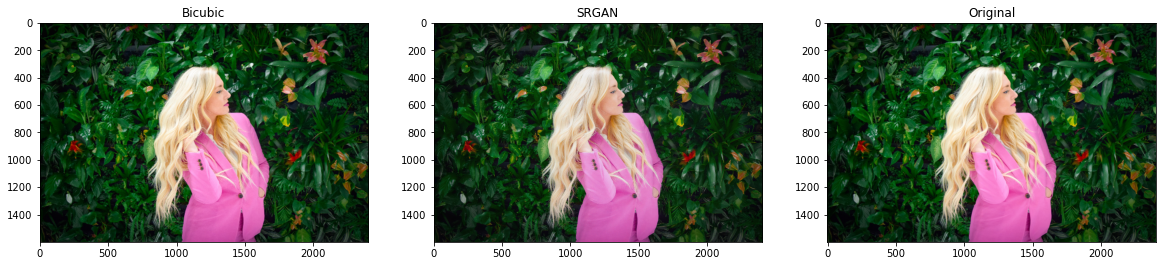

In [49]:
ds4_img = downsample_by_n(img, 4) # 1/4배 축소
us4_img = upsample_by_n(ds4_img, 4) # 4배 복원
srgan_img = apply_srgan(ds4_img)

# 이미지를 시각화합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(us4_img, cv2.COLOR_BGR2RGB)); plt.title('Bicubic')
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(srgan_img, cv2.COLOR_BGR2RGB)); plt.title('SRGAN')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Original')

Text(0.5, 1.0, 'Original')

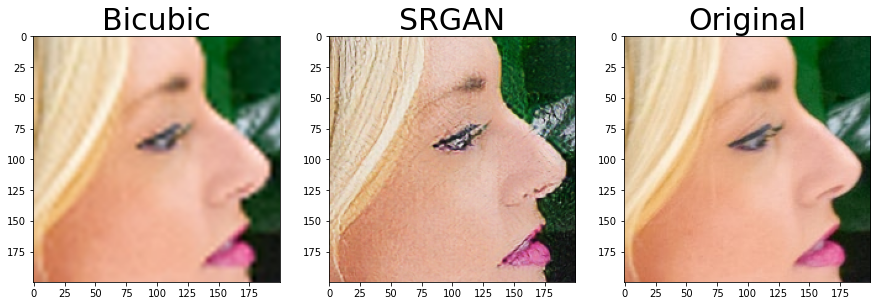

In [54]:
left_top = (420, 1200)
crop_bicubic = crop(us4_img, left_top)
crop_srgan = crop(srgan_img, left_top)
crop_orig = crop(img, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(crop_bicubic, cv2.COLOR_BGR2RGB)); plt.title("Bicubic", fontsize=30)
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(crop_srgan, cv2.COLOR_BGR2RGB)); plt.title("SRGAN", fontsize=30)
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(crop_orig, cv2.COLOR_BGR2RGB)); plt.title("Original", fontsize=30)

4. **srgan 결과 평가**

+ 사진에 찍힌 대상이 무엇이든 간에 유사한 색이 계속되는 영역에서 우글우글한 질감으로 이미지가 복원 되는 것을 확인할 수 있었다. 
  + div2k는 이름에서 볼 수 있다시피 가로나 세로 중 큰 방향이 2000픽셀 정도로 이루어진 데이터 셋이며 피쳐맵을 비교하여 로스를 계산하는데 사용된 vgg19는 이미지넷 데이터로 학습된 모델이다. 
    + 데이터 셋 일부를 살펴봤을 때 실습에서 사용한 이미지가 원 해상도를 제외하면 모델 사전 학습에 사용된 데이터와 특별히 상이한 것 같지는 않았다. 
  + div2k는 따로 라벨링이 되어 있지 않으며 vgg19 중 라벨 분류에 사용된 마지막 층은 제거하고 피처맵만을 사용하였으므로 모든 물체에 대해 동일한 질감의 패턴으로 복원하도록 학습되었을 수 있을 것 같다.
+ 원본 사진에서 초점이 흐릿한지 잘 맞춰져 있는지에 관계 없이 전반적으로 edge가 또렷하게 복원된 것을 확인할 수 있었으며 사진을 부분적으로 살펴볼 때 선명하면서 이상한 사진으로 복원되는 것을 확인할 수 있었다.   
  + 데이터 셋이 선명한 사진이 많다보니 원본에서는 약간 흐릿한 초점으로 맞춰진 피사체도 선명하게 복원하도록 학습이 된게 아닐까.
+ 건물 사진을 보면 사진 해상도를 낮추면서 사선인 경계선이 계단같은 선으로 정보가 손실된 측면이 있는데 그러한 영역은 해상도를 4배로 증가시키면서 사선이 아닌 계단 형태로 복원되었다. 
  + 일정부분 손실된 정보에 기인해 해상도를 높이다 보니 왜곡된 구조가 그대로 유지되었다.

---
### 프로젝트 1-2   
프로젝트 1-2.   

1. 낮은 해상도 이미지를 불러온다.   
2. srgan, bicubic interpolation으로 해상도 낮은 이미지의 픽셀 수를 4배 증가 시킨다.   
3. 두 방법으로 해상도가 증가한 결과물을 비교해 본다.  

해상도 낮은 내 사진을 이용했다.
   
1. **이미지 불러오기**

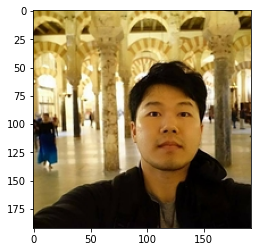

In [64]:
image_path = os.getenv('HOME')+'/aiffel/super_resolution/images/image_lr.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

2. **srgan, bicubic interpolation으로 4배 늘리기**

Text(0.5, 1.0, 'SRGAN')

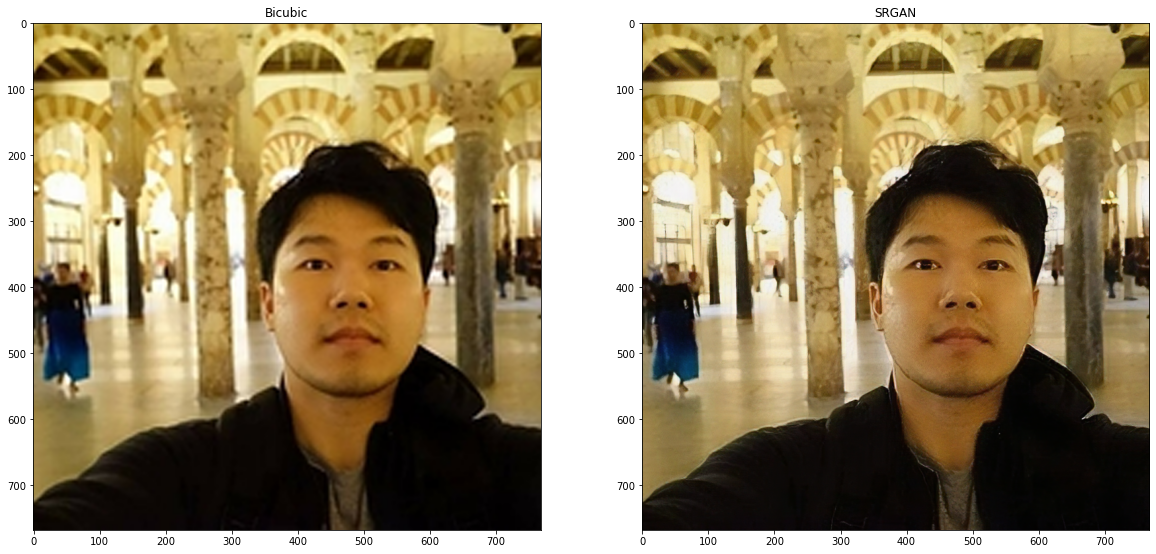

In [65]:
bicubic4_img = upsample_by_n(img, 4)
srgan_img = apply_srgan(img)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic4_img); plt.title('Bicubic')
plt.subplot(1,2,2); plt.imshow(srgan_img); plt.title('SRGAN')

3. **시각화 하기**

Text(0.5, 1.0, 'SRGAN')

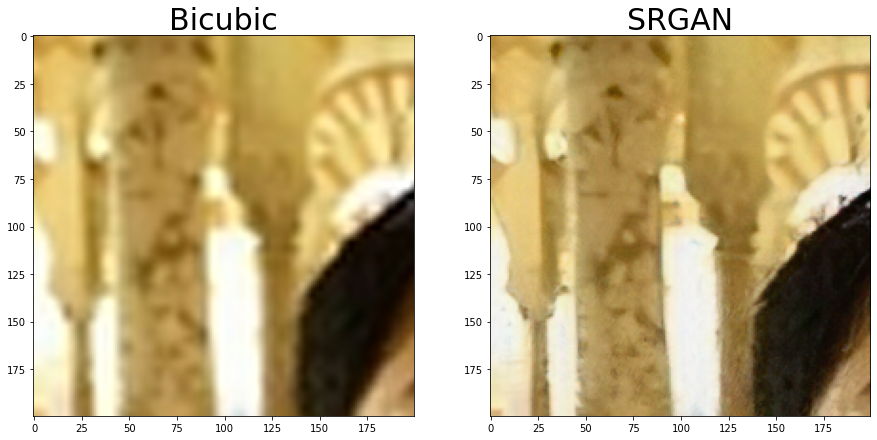

In [66]:
left_top = (150, 200)
crop_bicubic = crop(bicubic4_img, left_top)
crop_srgan = crop(srgan_img, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(crop_bicubic); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(crop_srgan); plt.title("SRGAN", fontsize=30)

4. **결과 평가**
+ bicubic interpolation 보다 srgan에서 사진에서 색이 변하는 경계가 또렷하게 되도록 복원이 되었다. 
  + 사진을 축소했다 복원하는 것을 확인했던 프로젝트 1-1의 결과와 유사하며 이 또한 srgan이 선명하게 사진을 복원하도록 학습이 된 것이 아닐지 추측해 본다.
  + validation high resolution 사진을 봤을 때 심도가 깊게 모든 피사체에 초점을 맞춘 사진이 아닌 특정 피사체에만 촛점을 맞춘 사진도 있지만 촛점이 맞은 주 피사체는 굉장히 선명하게 보이며 선이 선명하게 보이는 사진들이어서 그와 유사한 형태로 사진을 생성하게 학습된게 아닐까.

---
## 프로젝트 2 : SRGAN을 이용해 고해상도 gif 생성하기

1. **gif 파일 불러오기**

In [67]:
gif_path = os.getenv('HOME')+'/aiffel/super_resolution/images/fire_lr.gif'

In [68]:
gif = cv2.VideoCapture(gif_path)

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 14
frame 크기 : (282, 300, 3)


2. **프레임별 super resolution 적용하기**   

In [70]:
frames_sr_srgan = []
for frame in frames:
    frames_sr.append(apply_srgan(frame))

In [72]:
frames_sr_bicubic = []
for frame in frames:
    frames_sr_bicubic.append(upsample_by_n(frame, 4))

3. **프레임을 합쳐 gif 만들기**

In [71]:
import imageio
imageio.mimsave('fire_hr_srgan.gif', frames_sr_srgan)

In [74]:
imageio.mimsave('fire_hr_bicubic.gif', frames_sr_bicubic)

4. **Jupyter notebook에 gif 표시하기**   

+ SRGAN gif   
   
![fire_sr_gif](https://drive.google.com/file/d/1oq76G4kxNHNlBriEienTbgSHLPn1TsoF/view?usp=sharing){: width="100%" height="100%"}  

[srgan_gif](https://drive.google.com/file/d/1oq76G4kxNHNlBriEienTbgSHLPn1TsoF/view?usp=sharing){target="_blank"}

+ bicubic gif  
   
![fire_sr_bicubic_gif](https://drive.google.com/file/d/1scCXivZhzzBnGq2VNkHFG4S2AQ3-6Xa_/view?usp=sharing){: width="100%" height="100%"}   
   
[bicubic_gif](https://drive.google.com/file/d/1scCXivZhzzBnGq2VNkHFG4S2AQ3-6Xa_/view?usp=sharing){target="_blank"}   

+ low resolution gif   
   
![fire_lr](https://drive.google.com/file/d/1UDzGTEZzdb82iFxY9DtLoiiPbTWRb31N/view?usp=sharing){: width="100%" height="100%"}   
   
[original_lr_gif](https://drive.google.com/file/d/1UDzGTEZzdb82iFxY9DtLoiiPbTWRb31N/view?usp=sharing){target="_blank"}